# 仿真结果总结

本次仿真旨在根据输入的绳长数据模拟软体机器人的末端位置，并与真实的末端坐标进行对比。

## 仿真设置

* **输入数据:** 使用 `circle_without_0.xlsx` 文件中的绳长 (`cblen1-3`) 和目标真实末端坐标 (`X, Y, Z`) 数据。
* **仿真方法:** 采用手动 PyBullet 环境和自定义 `ODE` 类（包含轴向-弯曲耦合模型）进行仿真。仿真逻辑为非累计式，即根据每个时间步的输入 `dl` 数据，从标准初始状态 (`y0 = [0,..,I]`) 计算当前的目标形态，并相对于固定的世界坐标基座进行可视化。
* **关键参数:**
    * ODE 耦合系数 (`k_strain` / `axial_strain_coefficient`): **-20**
    * 轴向动作缩放 (`AXIAL_ACTION_SCALE`): **0.02**

## 仿真结果

* **可视化图表:** (已生成，此处仅描述)
    * **2D 坐标图:** 对比了仿真计算出的末端 XY 坐标 (`sim_X_mm`, `sim_Y_mm`) 与文件中记录的真实末端 XY 坐标 (`X_real_mm`, `Y_real_mm`)。
    * **坐标跟踪图:** 可能展示了仿真轨迹（由 `sim_X_mm`, `sim_Y_mm` 连接而成）与真实轨迹（由 `X_real_mm`, `Y_real_mm` 连接而成）的路径对比。
* **定量误差分析 (末端位置):**
    * 平均损失 (总体误差，通常指仿真点与真实点之间的平均欧氏距离): **121.524 mm**
    * X 轴误差 (平均): **21.386 mm** (通常指 X 方向差值的平均绝对值或均方根)
    * Y 轴误差 (平均): **27.720 mm** (通常指 Y 方向差值的平均绝对值或均方根)

## 简要分析

在当前的参数设置 (`k_strain=-20`, `AXIAL_ACTION_SCALE=0.02`) 下，仿真结果与真实数据之间存在较为显著的偏差，平均误差超过 120 mm。X 轴和 Y 轴也分别存在约 20-30 mm 的平均误差。

这表明当前的模型参数或模型结构可能未能精确捕捉实际机器人的行为。误差较大的原因可能包括：
1.  **模型参数不匹配:** `k_strain = -20` 的值可能过大，导致轴向耦合效应被过度放大；`AXIAL_ACTION_SCALE = 0.02` 可能不合适；`initial_length` 或 `cable_distance` 与实际不符。
2.  **模型简化:** 当前 ODE 模型可能未考虑如材料非线性、滞后、重力变形、动态效应、与环境接触等因素。
3.  **数据问题:** 输入的绳长数据或记录的真实坐标数据可能存在噪声或测量误差。


---

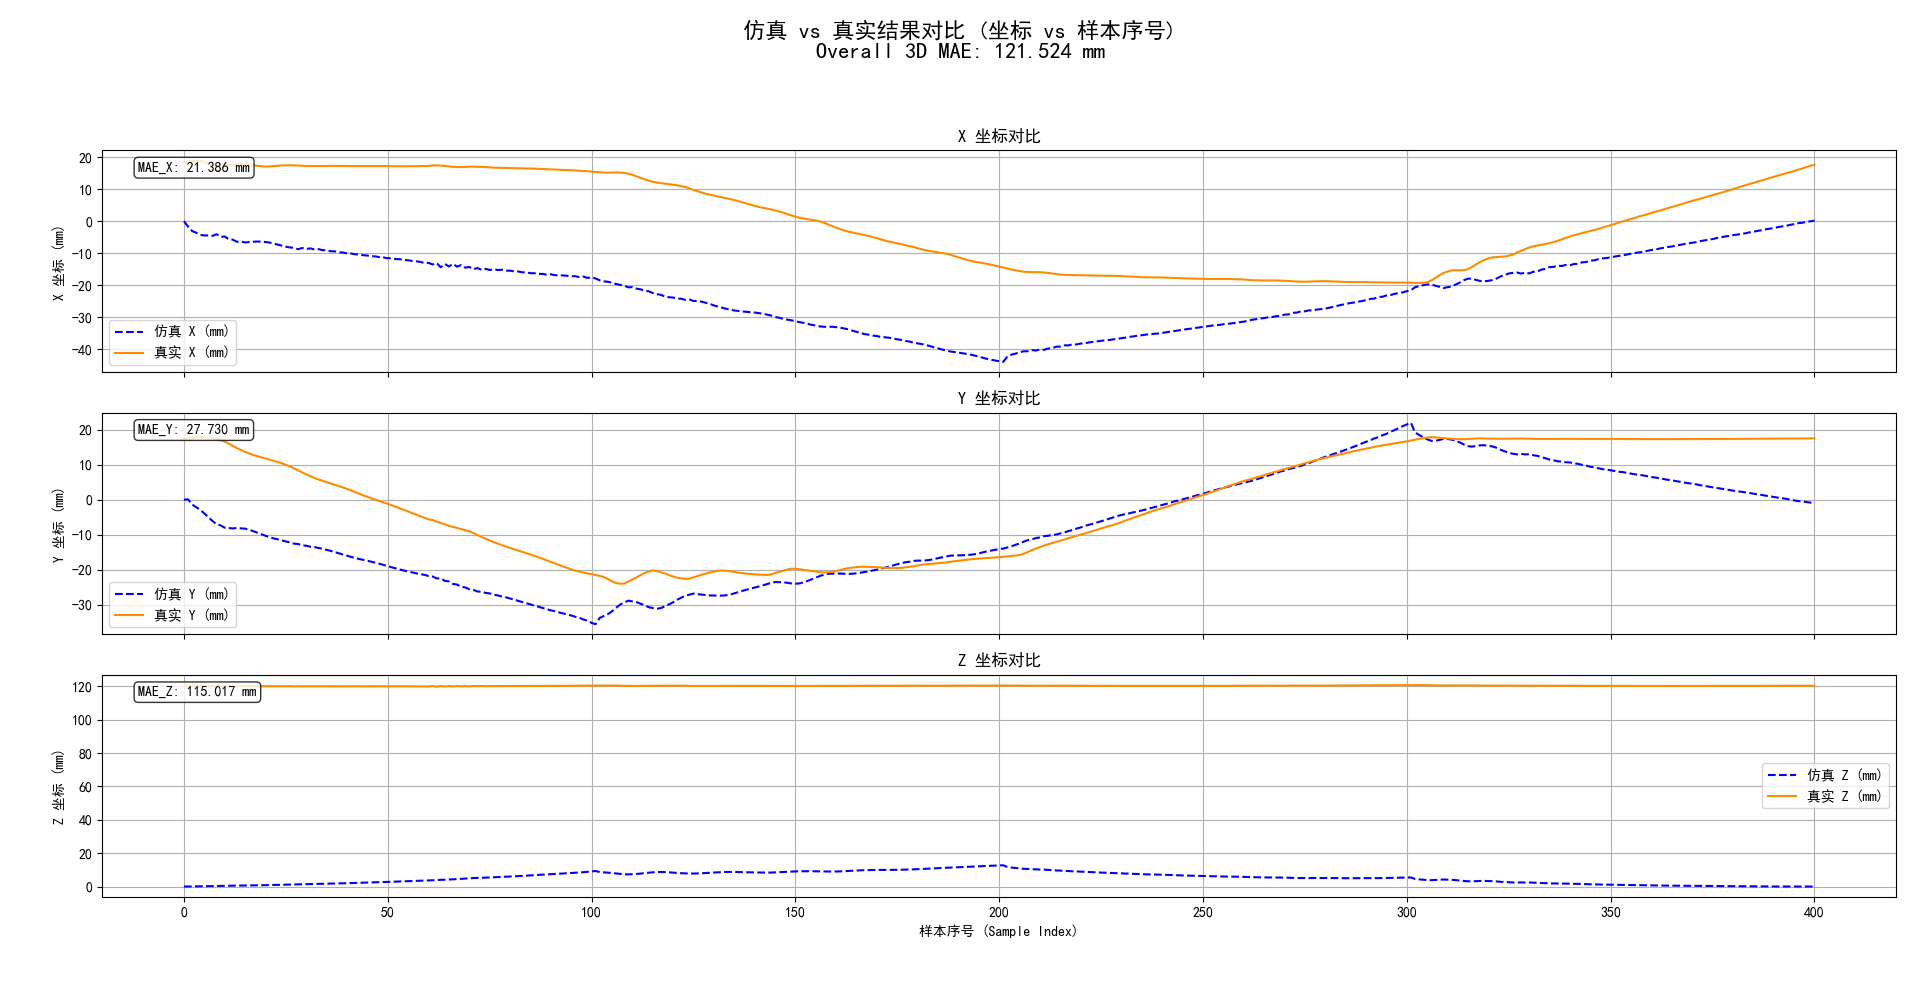

In [5]:
from IPython.display import Image
Image(filename='D:/data/save_data/Version_20250422_1(circle_without_0,k=-20.a=0.02).png', width=600) # width 参数可选，用于调整显示宽度

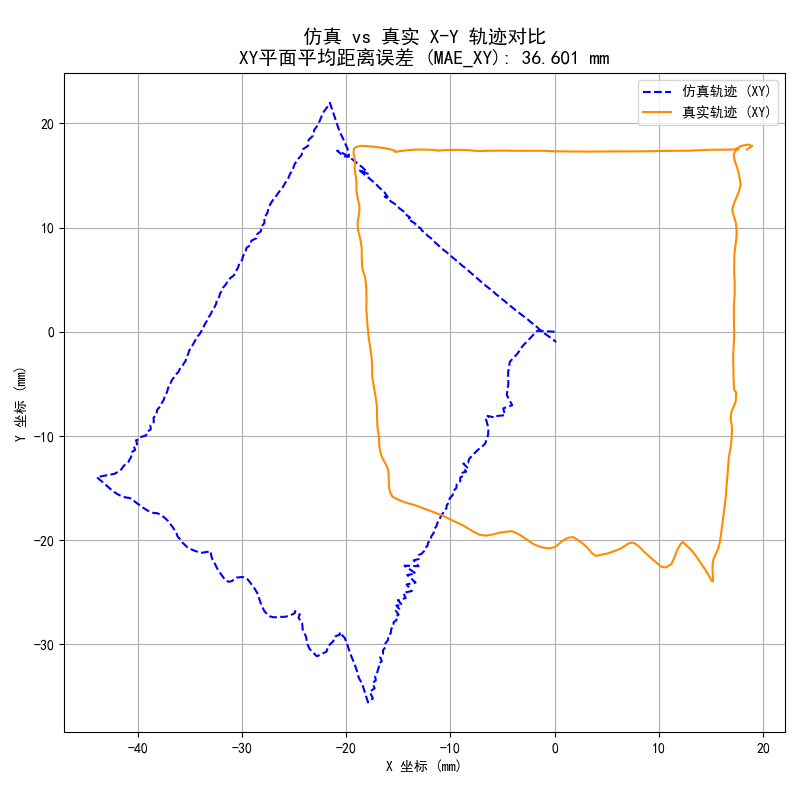

In [4]:
Image(filename='D:/data/save_data/Version_20250422_1_2D(circle_without_0,k=-20.a=0.02).png', width=300) # width 参数可选，用于调整显示宽度